In [1]:
!git clone 'https://github.com/shilpiprd/ERA-Solution.git'
%cd ERA-Solution/Sess11\ Solution/

Cloning into 'ERA-Solution'...
remote: Enumerating objects: 210, done.
remote: Counting objects: 100% (210/210), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 210 (delta 86), reused 172 (delta 48), pack-reused 0
Receiving objects: 100% (210/210), 34.85 MiB | 24.23 MiB/s, done.
Resolving deltas: 100% (86/86), done.
/content/ERA-Solution/Sess11 Solution


In [2]:
!pip install torch_lr_finder
!pip install ttach

In [3]:
from models.resnet import ResNet18
# from dataloader import train_loader, test_loader
import torch

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


In [4]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18()
model = model.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

100%|██████████| 170498071/170498071 [00:04<00:00, 42447808.91it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


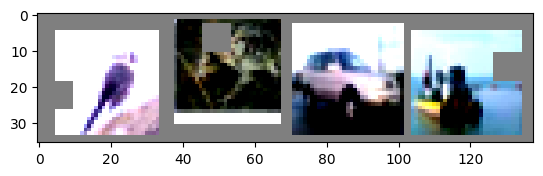

bird  frog  car   ship 


In [5]:
#wanna visualize ur data ?
from my_main import visualize_train_data
visualize_train_data()

  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.81E-03


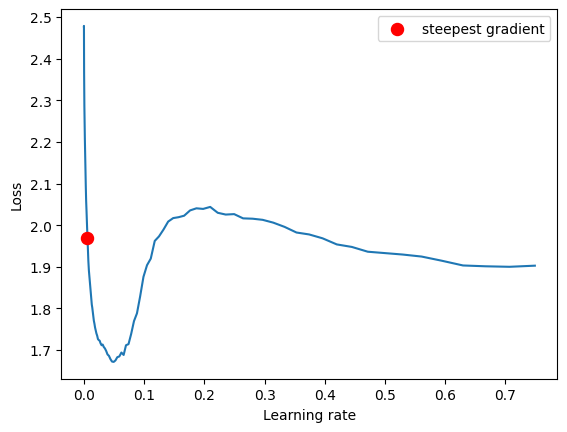

In [6]:
#implementing oneCycleLR
#adding new code
import copy
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_lr_finder import LRFinder
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import ReduceLROnPlateau
#importing train_loader from one
from my_utils import train_loader, classes, test_loader
from my_main import train, test

net_exp = copy.deepcopy(model)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_exp.parameters(), lr = 1e-3 , momentum = 0.85)
lr_finder = LRFinder(net_exp, optimizer, criterion, device = "cuda")
lr_finder.range_test(train_loader, start_lr=1e-5, end_lr=1, num_iter=200, step_mode="exp")
lr_finder.plot(log_lr = False)
lr_finder.reset()

In [8]:
# deliberate_error =
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import OneCycleLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.85)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.2)
EPOCHS = 24
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,
                                                max_lr= 5.81E-03,#7.49E-01, #6.52E-03, #set this value
                                                steps_per_epoch=len(train_loader),
                                                epochs=EPOCHS,
                                                pct_start=0.2,
                                                three_phase=False, #adding this on my own
                                                final_div_factor=100, #adding this on my own
                                                anneal_strategy='linear')


In [9]:
from my_main import train, test
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import ReduceLROnPlateau
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH: ", epoch)
    train_acc, train_loss = train(model, device, train_loader, optimizer, scheduler, criterion)
    test_acc, test_loss = test(model, device, test_loader, criterion)

EPOCH:  0


Loss=1.8510884046554565 LR=0.0002324 Batch_id=97 Accuracy=20.95: 100%|██████████| 98/98 [00:39<00:00,  2.50it/s]



Test set: Average loss: 0.0037, Accuracy: 3118/10000 (31.18%)

EPOCH:  1


Loss=1.6829118728637695 LR=0.0002324 Batch_id=97 Accuracy=34.42: 100%|██████████| 98/98 [00:38<00:00,  2.55it/s]



Test set: Average loss: 0.0032, Accuracy: 4107/10000 (41.07%)

EPOCH:  2


Loss=1.5088475942611694 LR=0.0002324 Batch_id=97 Accuracy=41.07: 100%|██████████| 98/98 [00:38<00:00,  2.52it/s]



Test set: Average loss: 0.0030, Accuracy: 4445/10000 (44.45%)

EPOCH:  3


Loss=1.451540470123291 LR=0.0002324 Batch_id=97 Accuracy=44.84: 100%|██████████| 98/98 [00:39<00:00,  2.51it/s]



Test set: Average loss: 0.0028, Accuracy: 4823/10000 (48.23%)

EPOCH:  4


Loss=1.3224053382873535 LR=0.0002324 Batch_id=97 Accuracy=47.64: 100%|██████████| 98/98 [00:38<00:00,  2.53it/s]



Test set: Average loss: 0.0027, Accuracy: 5066/10000 (50.66%)

EPOCH:  5


Loss=1.3537706136703491 LR=0.0002324 Batch_id=97 Accuracy=50.69: 100%|██████████| 98/98 [00:38<00:00,  2.53it/s]



Test set: Average loss: 0.0026, Accuracy: 5250/10000 (52.50%)

EPOCH:  6


Loss=1.3493709564208984 LR=0.0002324 Batch_id=97 Accuracy=52.88: 100%|██████████| 98/98 [00:38<00:00,  2.54it/s]



Test set: Average loss: 0.0025, Accuracy: 5502/10000 (55.02%)

EPOCH:  7


Loss=1.2432701587677002 LR=0.0002324 Batch_id=97 Accuracy=55.00: 100%|██████████| 98/98 [00:38<00:00,  2.53it/s]



Test set: Average loss: 0.0024, Accuracy: 5704/10000 (57.04%)

EPOCH:  8


Loss=1.2110404968261719 LR=0.0002324 Batch_id=97 Accuracy=57.28: 100%|██████████| 98/98 [00:38<00:00,  2.54it/s]



Test set: Average loss: 0.0024, Accuracy: 5630/10000 (56.30%)

EPOCH:  9


Loss=1.2261292934417725 LR=0.0002324 Batch_id=97 Accuracy=58.75: 100%|██████████| 98/98 [00:38<00:00,  2.53it/s]



Test set: Average loss: 0.0024, Accuracy: 5834/10000 (58.34%)

EPOCH:  10


Loss=0.9883901476860046 LR=0.0002324 Batch_id=97 Accuracy=60.62: 100%|██████████| 98/98 [00:38<00:00,  2.52it/s]



Test set: Average loss: 0.0021, Accuracy: 6226/10000 (62.26%)

EPOCH:  11


Loss=1.1182878017425537 LR=0.0002324 Batch_id=97 Accuracy=61.92: 100%|██████████| 98/98 [00:39<00:00,  2.50it/s]



Test set: Average loss: 0.0020, Accuracy: 6364/10000 (63.64%)

EPOCH:  12


Loss=0.9548348784446716 LR=0.0002324 Batch_id=97 Accuracy=63.32: 100%|██████████| 98/98 [00:38<00:00,  2.53it/s]



Test set: Average loss: 0.0020, Accuracy: 6438/10000 (64.38%)

EPOCH:  13


Loss=1.0344589948654175 LR=0.0002324 Batch_id=97 Accuracy=64.49: 100%|██████████| 98/98 [00:38<00:00,  2.52it/s]



Test set: Average loss: 0.0020, Accuracy: 6360/10000 (63.60%)

EPOCH:  14


Loss=0.924100399017334 LR=0.0002324 Batch_id=97 Accuracy=65.84: 100%|██████████| 98/98 [00:38<00:00,  2.53it/s]



Test set: Average loss: 0.0020, Accuracy: 6551/10000 (65.51%)

EPOCH:  15


Loss=0.9835489392280579 LR=0.0002324 Batch_id=97 Accuracy=67.04: 100%|██████████| 98/98 [00:38<00:00,  2.53it/s]



Test set: Average loss: 0.0018, Accuracy: 6796/10000 (67.96%)

EPOCH:  16


Loss=0.9023532867431641 LR=0.0002324 Batch_id=97 Accuracy=67.87: 100%|██████████| 98/98 [00:39<00:00,  2.50it/s]



Test set: Average loss: 0.0018, Accuracy: 6840/10000 (68.40%)

EPOCH:  17


Loss=0.9377070069313049 LR=0.0002324 Batch_id=97 Accuracy=68.33: 100%|██████████| 98/98 [00:38<00:00,  2.53it/s]



Test set: Average loss: 0.0019, Accuracy: 6672/10000 (66.72%)

EPOCH:  18


Loss=0.8755583763122559 LR=0.0002324 Batch_id=97 Accuracy=69.49: 100%|██████████| 98/98 [00:38<00:00,  2.53it/s]



Test set: Average loss: 0.0018, Accuracy: 6953/10000 (69.53%)

EPOCH:  19


Loss=0.8651425242424011 LR=0.0002324 Batch_id=97 Accuracy=70.09: 100%|██████████| 98/98 [00:38<00:00,  2.54it/s]



Test set: Average loss: 0.0016, Accuracy: 7066/10000 (70.66%)



In [10]:
test_acc

[31.18,
 41.07,
 44.45,
 48.23,
 50.66,
 52.5,
 55.02,
 57.04,
 56.3,
 58.34,
 62.26,
 63.64,
 64.38,
 63.6,
 65.51,
 67.96,
 68.4,
 66.72,
 69.53,
 70.66]

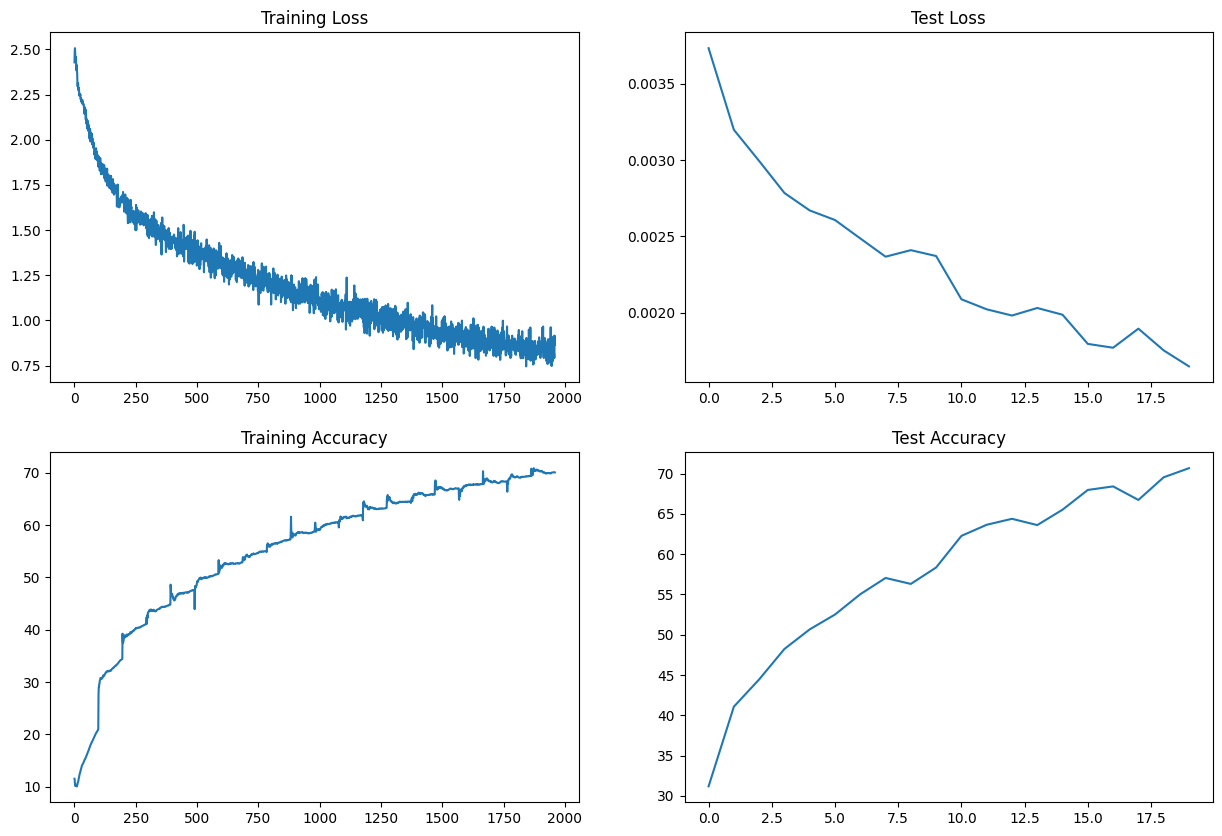

In [11]:
#visualize the trianing and test loss :
from my_utils import visualize_loss_accuracy
from torchvision import transforms
import math
visualize_loss_accuracy(train_loss,train_acc, test_loss, test_acc)

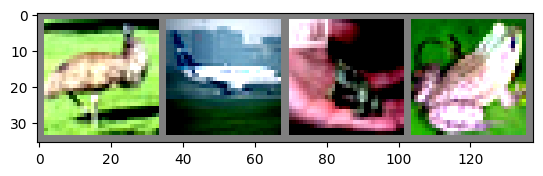

bird  plane frog  frog 


In [12]:
#display an image from test set
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from my_utils import test_loader

def imshow(img):
        img = img / 2 + 0.5     # unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.show()
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
dataiter = iter(test_loader)
images, labels = next(dataiter)
# images,labels = images.to(device),labels.to(device)
imshow(torchvision.utils.make_grid(images[:4])) #deciding to take 4 pictures
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

torch.Size([512, 3, 32, 32])


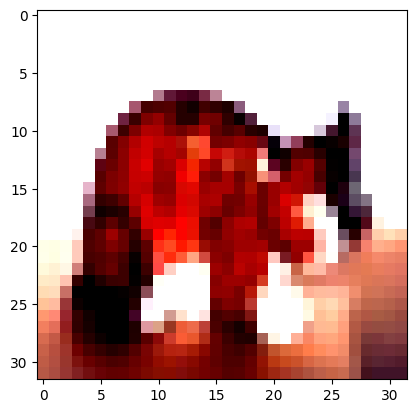

tensor([7], device='cuda:0')
horse


In [13]:
#dealing with a single image
print(images.shape)
imshow(images[4])
label_pred = model(images[4].unsqueeze(0).to(device))
label_idx = torch.argmax(label_pred, dim=1)
print(label_idx)
print(classes[label_idx])

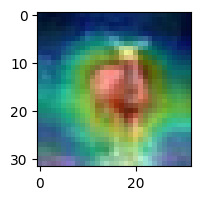

In [14]:
#applying gradcam on a single image from test set
from my_utils import visualize_gradcam_single
visualize_gradcam_single(model, 6) #6 is a random no. repr. index of image

In [15]:
!ls

data		   his_S11.ipynb  main.py  my_main.py	__pycache__	  README.md  utils.py
Experiments.ipynb  his_utils.py   models   my_utils.py	pytorch_grad_cam  run.ipynb


In [16]:
%cd Sess11\ Solution/

[Errno 2] No such file or directory: 'Sess11 Solution/'
/content/ERA-Solution/Sess11 Solution


In [17]:
# !cd ../
%cd ../

/content/ERA-Solution


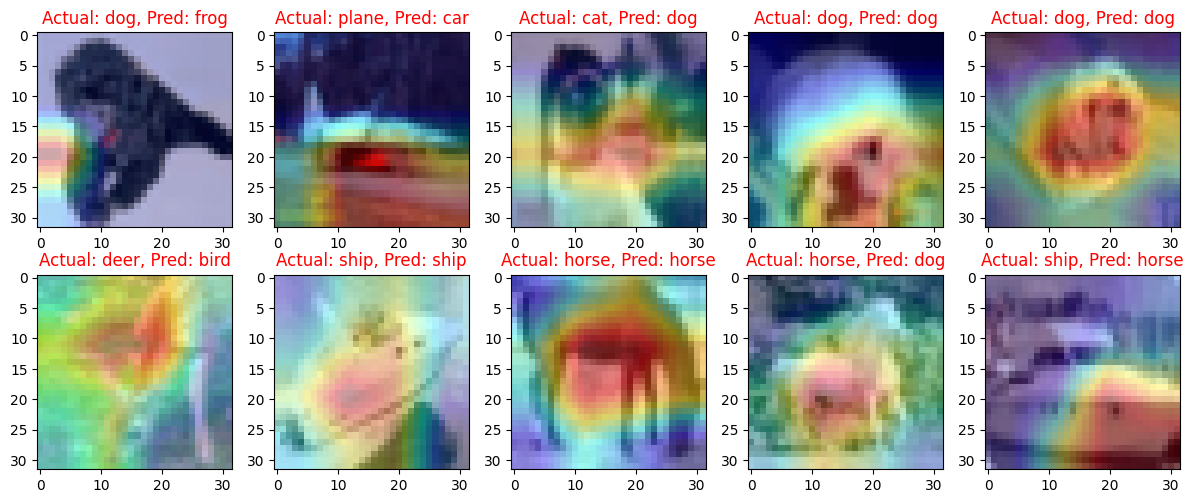

In [18]:
from my_utils import gradcam_misclassified
gradcam_misclassified(model, device)
#try adding a no. as to how many misclassified images u wanna apply gradcam on